In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/GauriPaithankar/Datasets/main/twitter_training.csv")

In [3]:
df.head()

,Tweet ID,Entity,Sentiment,Tweet Content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [4]:
df1 = pd.read_csv("https://raw.githubusercontent.com/GauriPaithankar/Datasets/main/twitter_validation.csv")
df1.head()

,Tweet ID,Entity,Sentiment,Tweet Content
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [5]:
vectorizer = TfidfVectorizer(max_features=10000)
X_train = vectorizer.fit_transform(df["Sentiment"])
X_val = vectorizer.transform(df1["Sentiment"])

model = MultinomialNB(alpha=1.5)
model.fit(X_train, df['Sentiment'])    

MultinomialNB(alpha=1.5)

In [6]:
predictions = model.predict(X_val)

from sklearn.metrics import f1_score

f1 = f1_score(df1['Sentiment'], predictions,average='micro')
print(f'F1 Score: {f1:.2f}')     

F1 Score: 1.00


In [7]:
print('Classification Report:\n', classification_report(df1['Sentiment'], predictions))
print('Confusion Matrix:\n', confusion_matrix(df1['Sentiment'], predictions))

Classification Report:
               precision    recall  f1-score   support

  Irrelevant       1.00      1.00      1.00       171
    Negative       1.00      1.00      1.00       266
     Neutral       1.00      1.00      1.00       285
    Positive       1.00      1.00      1.00       277

    accuracy                           1.00       999
   macro avg       1.00      1.00      1.00       999
weighted avg       1.00      1.00      1.00       999

Confusion Matrix:
 [[171   0   0   0]
 [  0 266   0   0]
 [  0   0 285   0]
 [  0   0   0 277]]


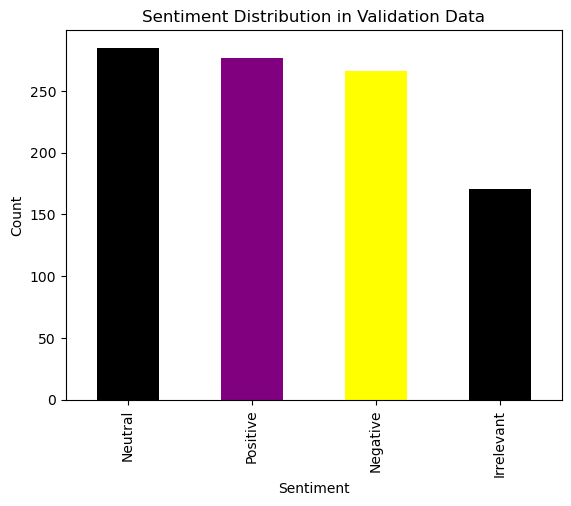

In [8]:
sentiment_distribution = df1['Sentiment'].value_counts()
sentiment_distribution.plot(kind='bar', color=['black', 'purple', 'yellow'])
plt.title('Sentiment Distribution in Validation Data')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

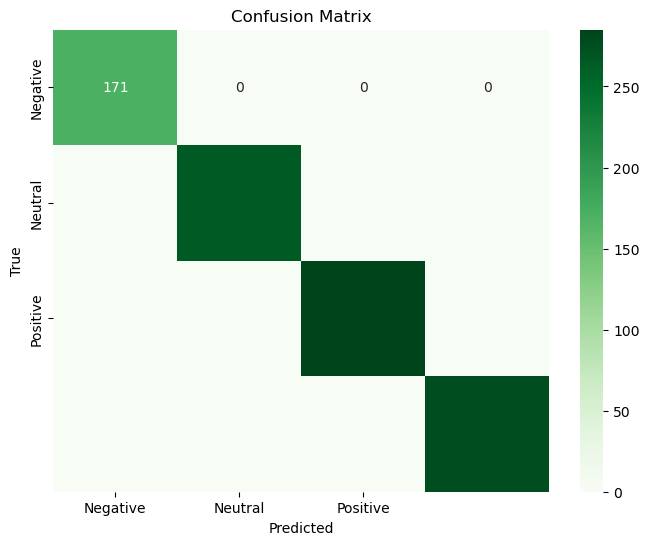

In [9]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(df1['Sentiment'], predictions), annot=True, fmt='d', cmap='Greens',
            xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

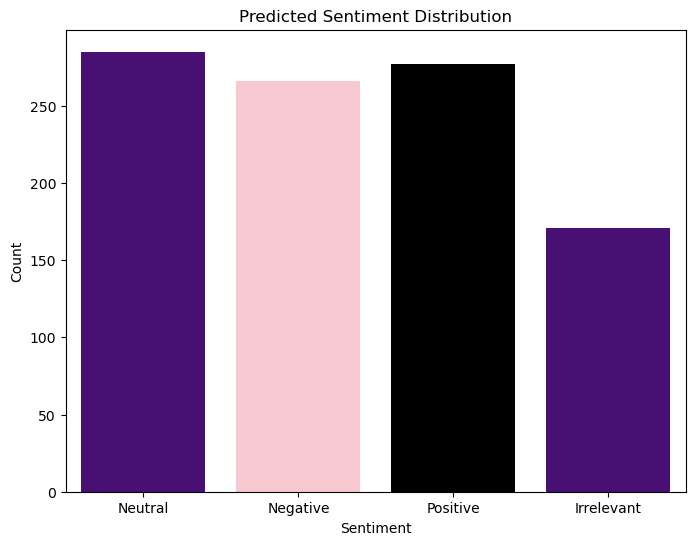

In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(x=predictions, palette=['indigo', 'pink', 'black'])
plt.title('Predicted Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

In [12]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [13]:
# Initialize Sentiment Intensity Analyzer
sid = SentimentIntensityAnalyzer()

# Function to preprocess text
def preprocess_text(text):
    if isinstance(text, str):  # Check if text is a string
        # Tokenize text
        tokens = word_tokenize(text)
        # Remove punctuation
        tokens = [word for word in tokens if word.isalpha()]
        # Convert to lowercase
        tokens = [word.lower() for word in tokens]
        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        tokens = [word for word in tokens if not word in stop_words]
        return ' '.join(tokens)
    else:
        return ''  # Return empty string if text is not a string

In [14]:
import sys
print(sys.executable)

C:\Users\DELL\anaconda3\python.exe


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud

# Download NLTK resources
nltk.download('vader_lexicon')
nltk.download('stopwords')

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

In [ ]:
# Apply preprocessing and sentiment analysis
df['clean_text'] = df['Tweet Content'].apply(preprocess_text)
df['sentiment_score'] = df['clean_text'].apply(lambda x: sid.polarity_scores(x)['compound'])

In [ ]:
# Plot sentiment distribution
plt.figure(figsize=(8, 6))
plt.hist(df['sentiment_score'], bins=30, color='skyblue', edgecolor='black')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
# Convert 'text' column to string type and handle missing values
df['Tweet Content'] = df['Tweet Content'].astype(str)

# Ensure 'text' column contains only string values
df['Tweet Content'] = df['Tweet Content'].apply(lambda x: x if isinstance(x, str) else "")

In [ ]:
# Function to get sentiment scores
def get_sentiment_score(text):
    return sid.polarity_scores(text)['compound']

# Apply sentiment analysis
df['sentiment_score'] = df['Tweet Content'].apply(get_sentiment_score)

# Generate word cloud of positive and negative sentiments
positive_text = ' '.join(df[df['sentiment_score'] > 0]['Tweet Content'])
negative_text = ' '.join(df[df['sentiment_score'] < 0]['Tweet Content'])

In [ ]:
from wordcloud import WordCloud
plt.figure(figsize=(15, 10))

plt.subplot(1, 2, 1)
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Positive Sentiment Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_text)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Negative Sentiment Word Cloud')
plt.axis('off')

plt.show()
